In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc



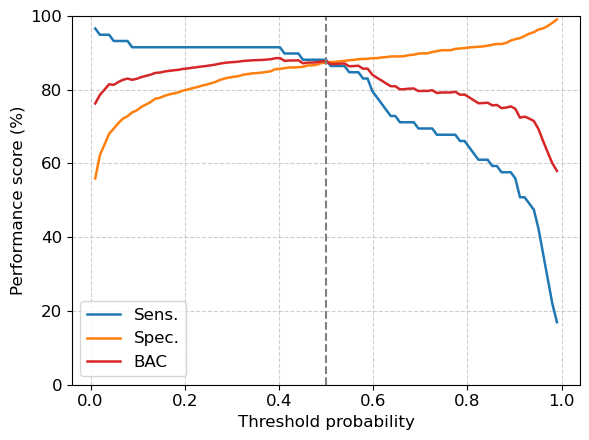

In [20]:
df4 = pd.read_excel("labelling_ML_fusion.xlsx")[["paper_id", "label", "probability"]]
df_final = pd.read_excel("agreement_aim_review.xlsx")[["paper_id", "label"]]
def compute_metrics(df_reviewer, df_final, name="Reviewer"):
    
    # Merge with ground truth
    df = df_reviewer.merge(df_final, on="paper_id", suffixes=("_pred", "_true"))
    
    y_true = df["label_true"]
    y_pred = df["label_pred"]
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # ---- Core Rates ----
    TPR = tp / (tp + fn) if (tp + fn) > 0 else 0          # Sensitivity / Recall
    TNR = tn / (tn + fp) if (tn + fp) > 0 else 0          # Specificity
    FPR = fp / (fp + tn) if (fp + tn) > 0 else 0          # Fall-out
    FNR = fn / (tp + fn) if (tp + fn) > 0 else 0          # Miss rate
    
    PPV = tp / (tp + fp) if (tp + fp) > 0 else 0          # Precision
    NPV = tn / (tn + fn) if (tn + fn) > 0 else 0          # Negative predictive value
    
    # ---- Balanced Accuracy (manual formula) ----
    BAC = 0.5 * (TPR + TNR)
    
    # ---- F1 score (manual formula) ----
    F1 = (2 * PPV * TPR) / (PPV + TPR) if (PPV + TPR) > 0 else 0
    
    # ---- P4 score (harmonic mean of PPV, TPR, TNR, NPV) ----
    if PPV > 0 and TPR > 0 and TNR > 0 and NPV > 0:
        P4 = 4 / ((1/PPV) + (1/TPR) + (1/TNR) + (1/NPV))
    else:
        P4 = 0
    
    
    results = {
        "Reviewer": name,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TPR (Sensitivity)": TPR,
        "TNR (Specificity)": TNR,
        "FPR": FPR,
        "FNR": FNR,
        "PPV (Precision)": PPV,
        "NPV": NPV,
        "Balanced Accuracy (BAC)": BAC,
        "F1 Score": F1,
        "P4 Score": P4

    }
    
    return results

results = compute_metrics(df4, df_final, "df4")
results_df = pd.DataFrame([results])

#Testing multiple thresholds
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Thresholds to test
thresholds = np.linspace(0.01,0.99,101)


df_final_renamed = df_final.rename(columns={"label": "label_true"})
threshold_results = []

for t in thresholds:
    df_thresh = df4.copy()
    # Generate predicted label using threshold
    df_thresh["label_pred"] = (df_thresh["probability"] >= t).astype(int)
    # Only keep paper_id and label_pred
    df_for_metrics = df_thresh[["paper_id", "label_pred"]]
    
    # Compute metrics against df_final_renamed
    metrics = compute_metrics(df_for_metrics, df_final_renamed, name=f"df4_thresh_{t}")
    threshold_results.append(metrics)

# Combine results
threshold_results_df = pd.DataFrame(threshold_results)

# Extract numeric threshold from Reviewer column
df_thresh = threshold_results_df.copy()
df_thresh['Threshold'] = df_thresh['Reviewer'].str.extract(r'_(0\.\d+)$').astype(float)

# Sort by threshold (important for clean line plot)
df_thresh = df_thresh.sort_values("Threshold")

# ----- Plot -----
fig, ax = plt.subplots(figsize=(4*1.5, 3*1.5))

plt.plot(df_thresh['Threshold'],
         100 * df_thresh['TPR (Sensitivity)'],
         linewidth=1.8,
         color='tab:blue',
         label='Sens.')

plt.plot(df_thresh['Threshold'],
         100 * df_thresh['TNR (Specificity)'],
         linewidth=1.8,
         color='tab:orange',
         label='Spec.')

plt.plot(df_thresh['Threshold'],
         100 * df_thresh['Balanced Accuracy (BAC)'],
         linewidth=1.8,
         color='tab:red',
         label='BAC')

# ----- Vertical threshold line -----
ax.axvline(x=0.5,
           color='grey',
           linestyle='--',
           linewidth=1.5)

# ----- Formatting -----
plt.xlabel("Threshold probability", fontsize=12)
plt.ylabel("Performance score (%)", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(fontsize=12)

plt.ylim(0, 100)   # since now in %
plt.tight_layout()
plt.savefig('fig3.1.pdf', format='pdf', bbox_inches='tight')
plt.show()


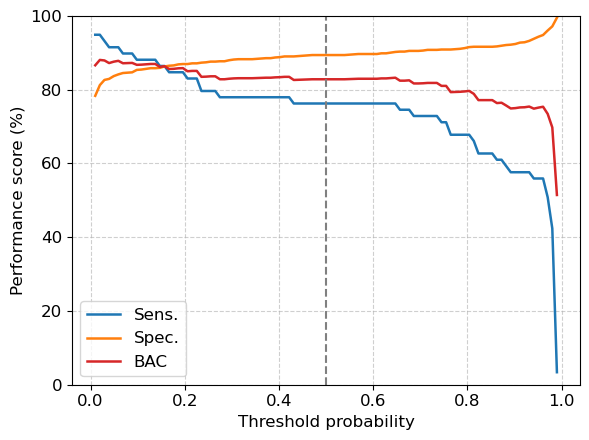

In [21]:
df4 = pd.read_excel("labelling_ML.xlsx")[["paper_id", "label", "probability"]]
df_final = pd.read_excel("agreement_aim_review.xlsx")[["paper_id", "label"]]
def compute_metrics(df_reviewer, df_final, name="Reviewer"):
    
    # Merge with ground truth
    df = df_reviewer.merge(df_final, on="paper_id", suffixes=("_pred", "_true"))
    
    y_true = df["label_true"]
    y_pred = df["label_pred"]
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # ---- Core Rates ----
    TPR = tp / (tp + fn) if (tp + fn) > 0 else 0          # Sensitivity / Recall
    TNR = tn / (tn + fp) if (tn + fp) > 0 else 0          # Specificity
    FPR = fp / (fp + tn) if (fp + tn) > 0 else 0          # Fall-out
    FNR = fn / (tp + fn) if (tp + fn) > 0 else 0          # Miss rate
    
    PPV = tp / (tp + fp) if (tp + fp) > 0 else 0          # Precision
    NPV = tn / (tn + fn) if (tn + fn) > 0 else 0          # Negative predictive value
    
    # ---- Balanced Accuracy (manual formula) ----
    BAC = 0.5 * (TPR + TNR)
    
    # ---- F1 score (manual formula) ----
    F1 = (2 * PPV * TPR) / (PPV + TPR) if (PPV + TPR) > 0 else 0
    
    # ---- P4 score (harmonic mean of PPV, TPR, TNR, NPV) ----
    if PPV > 0 and TPR > 0 and TNR > 0 and NPV > 0:
        P4 = 4 / ((1/PPV) + (1/TPR) + (1/TNR) + (1/NPV))
    else:
        P4 = 0
    
    
    results = {
        "Reviewer": name,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TPR (Sensitivity)": TPR,
        "TNR (Specificity)": TNR,
        "FPR": FPR,
        "FNR": FNR,
        "PPV (Precision)": PPV,
        "NPV": NPV,
        "Balanced Accuracy (BAC)": BAC,
        "F1 Score": F1,
        "P4 Score": P4

    }
    
    return results

results = compute_metrics(df4, df_final, "df4")
results_df = pd.DataFrame([results])

#Testing multiple thresholds
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Thresholds to test
thresholds = np.linspace(0.01,0.99,101)


df_final_renamed = df_final.rename(columns={"label": "label_true"})
threshold_results = []

for t in thresholds:
    df_thresh = df4.copy()
    # Generate predicted label using threshold
    df_thresh["label_pred"] = (df_thresh["probability"] >= t).astype(int)
    # Only keep paper_id and label_pred
    df_for_metrics = df_thresh[["paper_id", "label_pred"]]
    
    # Compute metrics against df_final_renamed
    metrics = compute_metrics(df_for_metrics, df_final_renamed, name=f"df4_thresh_{t}")
    threshold_results.append(metrics)

# Combine results
threshold_results_df = pd.DataFrame(threshold_results)

# Extract numeric threshold from Reviewer column
df_thresh = threshold_results_df.copy()
df_thresh['Threshold'] = df_thresh['Reviewer'].str.extract(r'_(0\.\d+)$').astype(float)

# Sort by threshold (important for clean line plot)
df_thresh = df_thresh.sort_values("Threshold")

# ----- Plot -----
fig, ax = plt.subplots(figsize=(4*1.5, 3*1.5))

plt.plot(df_thresh['Threshold'],
         100 * df_thresh['TPR (Sensitivity)'],
         linewidth=1.8,
         color='tab:blue',
         label='Sens.')

plt.plot(df_thresh['Threshold'],
         100 * df_thresh['TNR (Specificity)'],
         linewidth=1.8,
         color='tab:orange',
         label='Spec.')

plt.plot(df_thresh['Threshold'],
         100 * df_thresh['Balanced Accuracy (BAC)'],
         linewidth=1.8,
         color='tab:red',
         label='BAC')

# ----- Vertical threshold line -----
ax.axvline(x=0.5,
           color='grey',
           linestyle='--',
           linewidth=1.5)

# ----- Formatting -----
plt.xlabel("Threshold probability", fontsize=12)
plt.ylabel("Performance score (%)", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(fontsize=12)

plt.ylim(0, 100)   # since now in %
plt.tight_layout()
plt.savefig('fig3.2.pdf', format='pdf', bbox_inches='tight')
plt.show()